In [1]:
%matplotlib inline

In [157]:
import numpy as np
from msslib.utils import *
from msslib.cluster import *
import matplotlib.pyplot as plt
import functools as f
import random
from scipy import misc
from scipy.cluster import vq

In [192]:
data_dir = "/home/finlay/HMT/data/VenetusA/block_samples/LDA_block_samples/"
label_dir = "/home/finlay/HMT/data/VenetusA/block_samples/block_labels/"

out_dir = '/home/finlay/test_runs/LDA_centroid_run/A'

In [141]:
data_paths = sorted(listpaths(data_dir))
label_paths = sorted(listpaths(label_dir))

In [142]:
label_data = [(only_basename(l), np.load(l)/10, np.load(d)) for l, d in zip(label_paths, data_paths)]

In [160]:
random.shuffle(label_data)

training_pages = label_data[:50]
test_pages = label_data[50:]

In [144]:
def block_pair_to_centroids(a):
    return labelled_centroids(to_dict_list(zip(flatten_vector_matrix(a[1]).flatten(), flatten_vector_matrix(a[2]))))

centroids = labelled_centroids(to_dict_list(it.chain.from_iterable(map(block_pair_to_centroids, training_pages))))

In [199]:
cs = [c[1] for c in centroids]
ls = [c[0] for c in centroids]

for p in test_pages:
    n_l = np.zeros(p[1].shape[:2])
    o = p[2]
    for i in range(n_l.shape[0]):
        codes, dist = vq.vq(o[i], cs)
        n_l[i] = codes
    n_image = resize_img(n_l, (1200,900))
    n_image[n_image==64] = 10
    n_image[n_image==127] = 20
    n_image[n_image==191] = 30
    n_image[n_image==255] = 40

    name = p[0].split("_")[0]
    print(np.unique(n_image))
    oot= format_path(out_dir, 'png', name)
    misc.imsave(oot, n_image)

[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 40]
[ 0 10 20 30 4

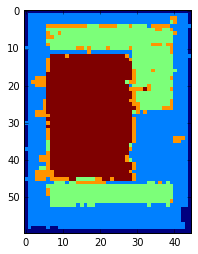

In [162]:
plt.imshow(n_l, interpolation='nearest')

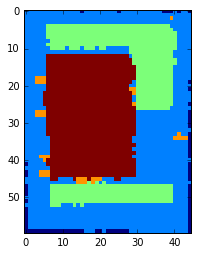

In [184]:
lab_1 = p[1].reshape(60,45)
plt.imshow(lab_1, interpolation='nearest')

In [164]:
p[0]

'VA115RN-0116_label'

In [185]:
last_img = misc.imread('/home/finlay/test_runs/block_centroid_runs/B/VA115RN-0116.png')
last_img = last_img/10

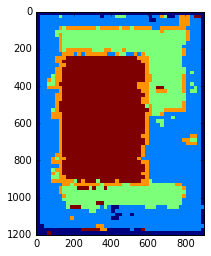

In [186]:
plt.imshow(last_img, interpolation='nearest')

In [215]:
path = '/home/finlay/test_runs/LDA_SSVM_grid_run/A/VA072RN-0073.png'
img = misc.imread(path)

In [216]:
img[img==30]

array([30, 30, 30, ..., 30, 30, 30], dtype=uint8)

In [217]:
misc.imsave(path,img)

In [208]:
img[400,400]

20